In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Portfolio assignment1: The Bertrand Paradox

## Statement of the problem

An interesting problem in probability theory is known as the Bertrand Paradox. This problem considers the probability that a random chord of a circle has a length greater than the side of the equilateral triangle that can be inscribed in that circle. Where it becomes more interesting; as it turns out the way in which we generate the random chord effects the probability that it is longer.


There are 3 particular methods of generating the chords that I will investigate:


### Method 1:
Random endpoints. Pick two random points on the circumference of the circle and join them with a straight line.
![alttext](Bertrand1.png)


### Method 2:
Random radius. Pick a random radius of the circle and then a random point on the radius. Construct the unique chord perpendicular to the point.
![alttext](Bertrand2.png)


### Method 3:
Random midpoint. Pick a point inside the circle at random and take this to be the midpoint of the chord perpendicular to the radius containing it.
![alttext](Bertrand3.png)




## Research

### In order to be able to complete this report I conducted the following research

I completed the following blocky exercises to help me to understand how to produce code to conduct Monte Carlo sampling:

* http://gtribello.github.io/mathNET/sor3012-week4-exercise.html
* http://gtribello.github.io/mathNET/sor3012-week5-exercise.html

I used the following websites to find out what the possible methods were to generate random chords:

* https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)
* http://web.mit.edu/tee/www/bertrand/problem.html

To give me some ideas on how to structure my code to generate the random chords I used the following website:

* https://scipython.com/blog/bertrands-paradox/


## Theory

### Length of Side of Triangle
It is important that we first understand how long the side of the triangle is in order to decide whether the length of any given chord is greater or smaller. To make our investigations throughout this report consistent and easy to understand I will only use the unit circle, which has a radius of 1.

As such we can calculate the length of the side of the equilateral triangle with in as follows:

$$
\cos(30)=\frac{L}{2} \\
\frac{\sqrt{3}}{2}=\frac{L}{2} \\
L=\sqrt{3}
$$

### Method 1

In method 1 we generate random chords by choosing two random points on the circumfrence of the unit circle and joining them with a straight line. This is undoubtedly the easiest method to understand. 

In order to understand the associated probability that a random chord generated by method 1 is longer than $\sqrt{3}$ we can attempt to visualise the problem. We can imagine that the one of the random points on the circle coincides with one of the corners of the equilateral triangle. We can see that if the other random point lies within the arc between the other two corners of the triangle then the chord is longer than $\sqrt{3}$, otherwise it is shorter. As this are consists of a third of the circumfrence of the circle, the probability that the second random point will fall in this arc is $\frac{1}{3}$ and therefore the probability that any chord is longer than $\sqrt{3}$ is $\frac{1}{3}$ when said chord is generated by method 1. 

### Method 2

In method 2 we generate random chords by first choosing a random radius of the circle. We then choose a point on this radius and form a chord which goes through this point on the radius and is perpendicular to the radius.

To calculate the probability associated with this method once again we can visualise the problem. We can imagine that one of the sides of the triangle is parallel to the random chord that we have generated. Then we can decide whether our random chord is longer than the side by looking at whether the side is closer to the center of the circle than the side is. 
Importantly the side of the triangle is a chord itself, and it bisects our random radius. As such half of our random chords along this radius will be longer than the side and half will be shorter. As such the probability that any chord is longer than $\sqrt{3}$ is $\frac{1}{2}$ when said chord is generated by method 2. 

### Method 3

Finally in the third method we generate random chords by choosing any random point within the circle and using this point as the midpoint of our chord.

Once again in this method the random chord is longer than the side if it is closer to the center of the circle than the side is. More specifically it is longer if the midpoint of the chord is closer to the center of the circle than the midpoint of the side. We can see that the midpoints of the sides of the triangle will always lie on the circle concentric to the unit circle that has a radius of $\frac{1}{2}$. Therefore if the midpoints of the chords lie within this circle then the chords are longer than $\sqrt{3}$. Because the area of said concentric circle is $\frac{1}{4}$ of the radius of the unit circle, the probability that we randomly choose a point in this concentric circle is $\frac{1}{4}$. 
As such the probability that any chord is longer than $\sqrt{3}$ is $\frac{1}{4}$ when said chord is generated by method 3. 

## Software

The thEoretical probabilities explained above can be put to the test by creating a program to generate random chords by the methods explained above and check whether these chords are longer than $\sqrt{3}$.


### Defining our circle and triangle
As discussed in the theory section I investigated this problem looking specifically at the unit circle and as such my radius throughout will be 1. It is important that within my software I define the length of a side of the equilateral triangle. This is important so I can compare the length of the chords to this later

In [33]:
r=1
tlen=np.sqrt(3)

### Generating random chords

#### Method 1

In [34]:
def bertrand1(r,nchords):
    angles = np.random.random((nchords,2)) * (2*np.pi)
    chords = np.array((r * np.cos(angles), r * np.sin(angles)))
    chords = np.swapaxes(chords, 0, 1)
    return chords

In the section of code above I have written a function which runs for a specified raduis and number of chords. When it runs it selects random points along the circumfrence of the circle and then joins them to make a chord.

#### Method 2 

In [35]:
def chords_from_midpoints(midpoints):
    '''This function does whatever it does'''
    chords = np.zeros((nchords, 2, 2))
    for i, (x0, y0) in enumerate(midpoints.T):
        m = -x0/y0
        c = y0 + x0**2/y0
        A, B, C = m**2 + 1, 2*m*c, c**2 - r**2
        d = np.sqrt(B**2 - 4*A*C)
        x = np.array( ((-B + d), (-B - d))) / 2 / A
        y = m*x + c
        chords[i] = (x, y)
    return chords

To generate random chords by method 2, I had to choose a random point on a random radius and use this to be the center of my chord. As such, I had to write a function which takes the midpoint of a given chord and returns its endpoints. This function is shown in the cell above and it works by considering the fact that the chord takes the general form of a straight line $y=mx+c$ but also the endpoints of the chord lie of the circumfrence of a circle which has the form $y^2+x^2=r^2$. Solving these equations simultaneously returns the 2 endpoints of the chord.

In [36]:
def bertrand2(r,nchords):
    angles = np.random.random(nchords) * (2*np.pi)
    radii = np.random.random(nchords) * r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords = chords_from_midpoints(midpoints)
    return chords

As such this function that genegerates chords by method 2, first generates a random radius. Then it chooses a random point along that radius and inputs this point into our function chords_from_midpoints which then returns the two end points. The function does this for your choosed number of chords 'nchords'.

#### Method 3 

In [37]:
def bertrand3(r,nchords):
    angles = np.random.random(nchords) * (2*np.pi)
    radii = np.sqrt(np.random.random(nchords)) * r
    midpoints = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    chords =chords_from_midpoints(midpoints)
    return chords
bertrand_methods={1:bertrand1, 2:bertrand2, 3:bertrand3}

The function that I have written to generate random chords by method 3 is almost exactly the same as that used in method 2. The function takes a random point and inputs the point into our function chords_from_midpoints to return the endpoints of the chord. The key difference to note with method 3 is that we want the points that we select at random to be uniformly distributed. We ensure this by weighting the radial distance by the square root of the random number chosen between 0 and 1. This simple addition makes sure that it is more likely to choose a point further out from the center and there are more points in this region. 

### Calculating Probability 

In [38]:
def probability(method_number,r,nchords):
    chords= bertrand_methods[method_number](r,nchords)
    success=0
    for i, chord in enumerate(chords):
        x,y=chord
        if np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2)>tlen:
            success=success+1
    prob=success/nchords
    return prob

probability(1,r,10000)

0.3329

To calculate the probability for each method I created this function. The function inputs each chord generated by the method and decides if it is a success or not. I have defined success to be a chord that is longer than the side of the triangle. The function sums up the number of successes and divides by the total number of chords inputted and returns the probability of success.  

### Calculating Sample Means

In [39]:
def longer(chord):
    x,y=chord
    if np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2)>tlen:
        return 1
    else: return 0
    
def mean(method_number,r,nchords):
    fsum=0
    chords= bertrand_methods[method_number](r,nchords)
    success=0
    for i, chord in enumerate(chords):
        x,y=chord
        z=longer(chord)
        fsum=fsum+z
    prob=fsum/nchords
    return prob

I then wrote a function which utilised resampling techniques to obtain a sample mean of the probability.

### Plotting Sample Means with Error Bars

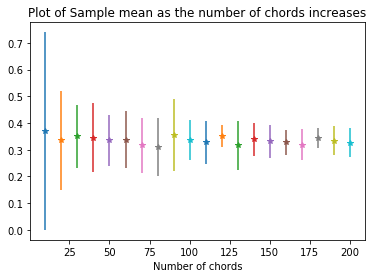

In [54]:
def splmeanplt(H):
    nchords=0
    m=[0]*10
    for j in range (20):
        nchords=nchords+10
        for i in range(10):
            m[i]=mean(H,1,nchords)

        m.sort()
        splmean=sum(m)/10    
        UC=m[math.floor(19/2)]-splmean
        LC=splmean-m[math.floor(1/2)]
        error=max(LC,UC)
        plt.errorbar(nchords,splmean,yerr=error, fmt='*')
        plt.xlabel('Number of chords')
        plt.title('Plot of Sample mean as the number of chords increases')
    plt.show()

splmeanplt(1)

The resampling function I created in the previous cell allowed me to calculate confidence limits and plot these as error bars. In the diagram above it can be seen that as I increase the number of chords the size of the error bars decreases. This means that as I increase my number of chords by sample probabilities become more accurate. However this diagram only looks at 1 of the methods and I would like to observe all 3 simultaneously. 

### Plotting Histograms for Comparison

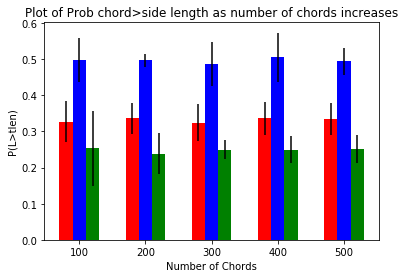

In [55]:
nchords=0
xvals1,xvals2,xvals3,=[0]*5,[0]*5,[0]*5
yvals1,yvals2,yvals3=[0]*5,[0]*5,[0]*5
error1,error2,error3=[0]*5,[0]*5,[0]*5
m=[0]*10
l=[0]*10
p=[0]*10

for j in range (5):
        nchords=nchords+100
        xvals1[j],xvals2[j],xvals3[j]=nchords-20,nchords,nchords+20
        for i in range(10):
            m[i]=mean(1,1,nchords)
            l[i]=mean(2,1,nchords)
            p[i]=mean(3,1,nchords)

        m.sort()
        splmean1=sum(m)/10    
        UC1=m[math.floor(19/2)]-splmean1
        LC1=splmean1-m[math.floor(1/2)]
        error1[j]=max(LC1,UC1)
        
        
        l.sort()
        splmean2=sum(l)/10    
        UC2=l[math.floor(19/2)]-splmean2
        LC2=splmean2-l[math.floor(1/2)]
        error2[j]=max(LC2,UC2)
        
        
        p.sort()
        splmean3=sum(p)/10    
        UC3=p[math.floor(19/2)]-splmean3
        LC3=splmean3-p[math.floor(1/2)]
        error3[j]=max(LC3,UC3)
            
        yvals1[j]=splmean1
        yvals2[j]=splmean2
        yvals3[j]=splmean3

fig, ax= plt.subplots()
prob1=ax.bar(xvals1, yvals1, 5*[20], yerr=error1,color='r')
prob2=ax.bar(xvals2, yvals2, 5*[20], yerr=error2,color='b')
prob3=ax.bar(xvals3, yvals3, 5*[20], yerr=error3,color='g')
ax.set_title('Plot of Prob chord>side length as number of chords increases')
ax.set_xlabel("Number of Chords")
ax.set_ylabel("P(L>tlen)")
plt.show()

My final piece of code plotted a histogram of the probability that a random chord was longer that the side of the triangle against the number of chords that we sampled.  As can be seen in the histogram, as the number of chords sampled increases the error bars decrease until there is no overlap between the error bars of the 3 different methods. 